In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Voting classifier
Could have voting='hard' or voting='soft'

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier([
    ('lr', log_clf),
    ('rf', rnd_clf),
    ('svc', svm_clf),
], voting='hard')
voting_clf.fit(X_train, y_train)

In [4]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


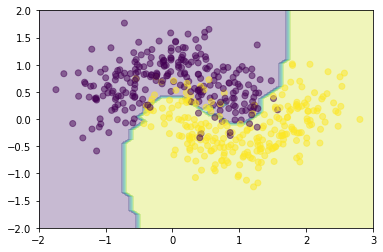

In [5]:
def plot_clf(clf, axes, *args, **kwargs):
    x0 = np.linspace(axes[0], axes[1])
    x1 = np.linspace(axes[2], axes[3])

    x0s, x1s = np.meshgrid(x0, x1)
    X_new = np.c_[x0s.ravel(), x1s.ravel()]
    y_pred = clf.predict(X_new).reshape(x0s.shape)

    plt.contourf(x0s, x1s, y_pred, *args, **kwargs)

plot_clf(voting_clf, axes=[-2, 3, -2, 2], alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

## Algorithms

### Bagging

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    n_jobs=-1,

    max_samples=100,
    bootstrap=True,

    oob_score=True
)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Oob Score:', bag_clf.oob_score_)
print('Accuracy', accuracy_score(y_test, y_pred))

Oob Score: 0.9226666666666666
Accuracy 0.92


### Pasting

In [7]:
pas_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    n_jobs=-1,
    
    max_samples=100,
    bootstrap=False,
).fit(X_train, y_train)

### Random subspaces

In [8]:
rs_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    n_jobs=-1,
    
    bootstrap=False,
    bootstrap_features=True,
    max_samples=1.0,
    max_features=1.0
).fit(X_train, y_train)

### Random Patches

In [9]:
rp_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    n_jobs=-1,

    bootstrap=True,
    bootstrap_features=True,
    max_samples=100,
    max_features=1.0,
).fit(X_train, y_train)

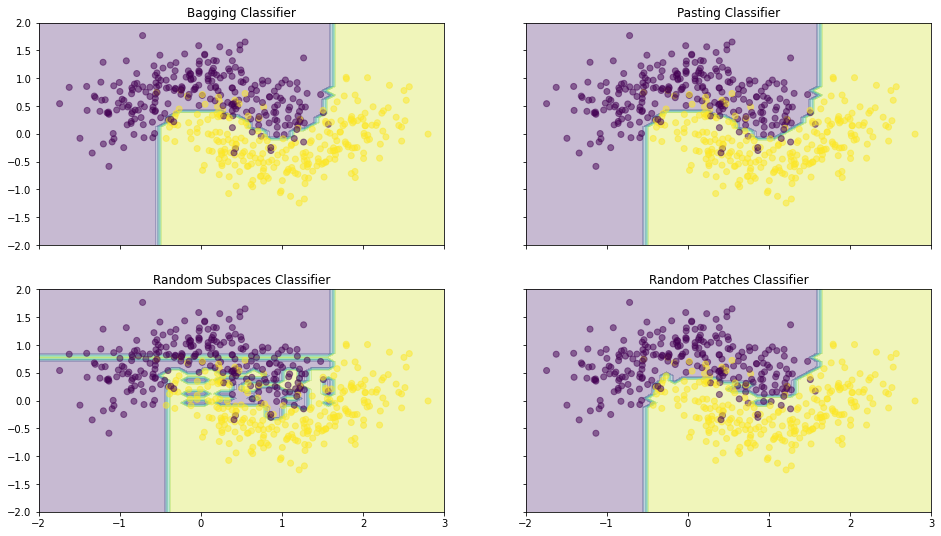

In [10]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16, 9))

plt.sca(axs[0, 0])
plt.title('Bagging Classifier')
plot_clf(bag_clf, axes=[-2, 3, -2, 2], alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)

plt.sca(axs[0, 1])
plt.title('Pasting Classifier')
plot_clf(pas_clf, axes=[-2, 3, -2, 2], alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)

plt.sca(axs[1, 0])
plt.title('Random Subspaces Classifier')
plot_clf(rs_clf, axes=[-2, 3, -2, 2], alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)

plt.sca(axs[1, 1])
plt.title('Random Patches Classifier')
plot_clf(rp_clf, axes=[-2, 3, -2, 2], alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)

fig.show()

## Random Forest

Accuracy 0.92


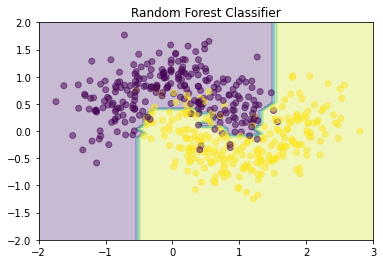

In [12]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

# Accuracy
y_pred_rf = rnd_clf.predict(X_test)
print('Accuracy', accuracy_score(y_test, y_pred_rf))

# Plot
plt.title('Random Forest Classifier')
plot_clf(rnd_clf, axes=[-2, 3, -2, 2], alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

## Extra-trees (Extremely Randomized Trees)
Uses random thresholds for each feature rather than searching for the best

Accuracy 0.872


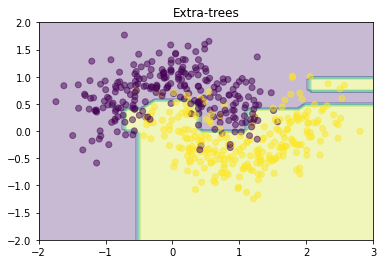

In [19]:
from sklearn.tree import ExtraTreeClassifier

etree_clf = ExtraTreeClassifier(max_leaf_nodes=26).fit(X_train, y_train)

# Accuracy
y_pred_etree = etree_clf.predict(X_test)
print('Accuracy', accuracy_score(y_test, y_pred_etree))

# Plot
plt.title('Extra-trees')
plot_clf(etree_clf, axes=[-2, 3, -2, 2], alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

## Feature Importance

### Iris

In [20]:
from sklearn.datasets import load_iris

iris = load_iris()

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'], iris['target'])

for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.1042795750820078
sepal width (cm) 0.024144112855302817
petal length (cm) 0.43203699414233704
petal width (cm) 0.4395393179203524


### MNIST numbers

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

rnd_clf = RandomForestClassifier(n_estimators=300, n_jobs=-1)
rnd_clf.fit(mnist['data'], mnist['target'])

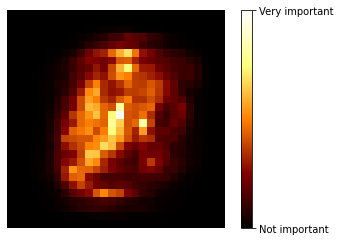

In [44]:
feature_importances = rnd_clf.feature_importances_.reshape(28, 28)
plt.imshow(feature_importances, cmap='afmhot', interpolation='nearest')

cbar = plt.colorbar(ticks=[feature_importances.min(), feature_importances.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.axis('off')

plt.show()

## Boosting

### AdaBoost

Accuracy 0.872


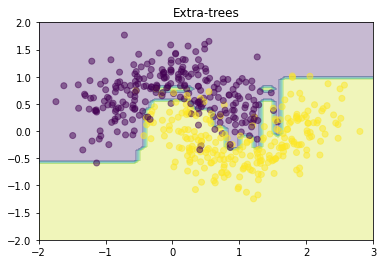

In [48]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm='SAMME.R', learning_rate=0.5)
ada_clf.fit(X_train, y_train)

# Accuracy
y_pred_ada = ada_clf.predict(X_test)
print('Accuracy', accuracy_score(y_test, y_pred_etree))

# Plot
plt.title('Extra-trees')
plot_clf(ada_clf, axes=[-2, 3, -2, 2], alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

### Gradient Boosting

#### Own

In [65]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0]**2 + 0.05 + np.random.randn(100)/10

In [66]:
from sklearn.tree import DecisionTreeRegressor

# First Step
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42).fit(X, y)

# Second Step
y2 = y - tree_reg.predict(X)
tree_reg_2 = DecisionTreeRegressor(max_depth=2, random_state=42).fit(X, y2)

# Third Step
y3 = y2 - tree_reg_2.predict(X)
tree_reg_3 = DecisionTreeRegressor(max_depth=2, random_state=42).fit(X, y3)

def predict(X):
    return np.sum(tree.predict(X) for tree in (tree_reg, tree_reg_2, tree_reg_3))

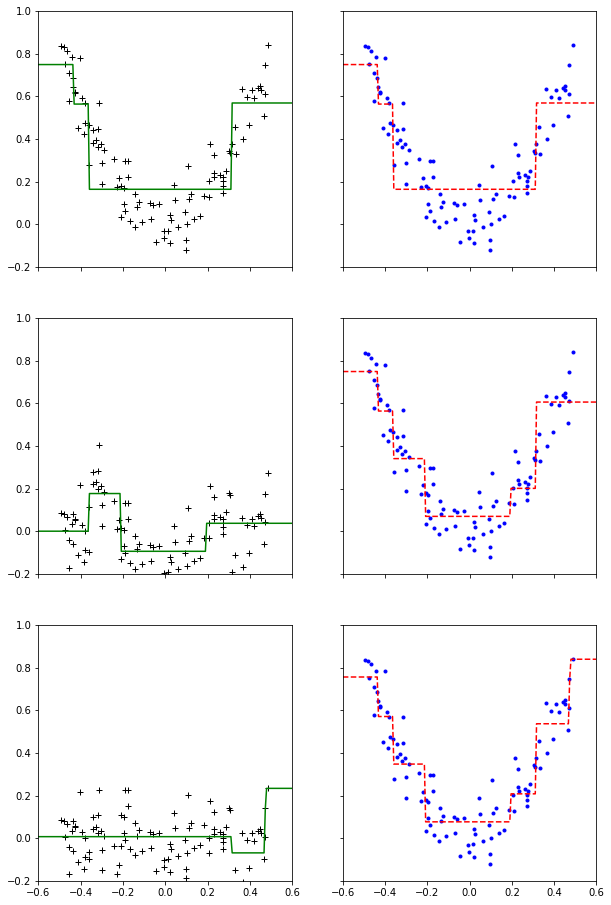

In [77]:
def plot_predictions(regressors, X, y, axes, style='r--', data_style='b.'):
    x1 = np.linspace(axes[0], axes[1], 200)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style)
    plt.plot(x1, y_pred, style)
    plt.axis(axes)

fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(10, 16))

# Sub trees
plt.sca(axs[0][0])
plot_predictions([tree_reg], X, y, [-0.6, 0.6, -0.2, 1], 'g-', 'k+')

plt.sca(axs[1][0])
plot_predictions([tree_reg_2], X, y2, [-0.6, 0.6, -0.2, 1], 'g-', 'k+')

plt.sca(axs[2][0])
plot_predictions([tree_reg_3], X, y3, [-0.6, 0.6, -0.2, 1], 'g-', 'k+')

# Predictions
plt.sca(axs[0][1])
plot_predictions([tree_reg], X, y, [-0.6, 0.6, -0.2, 1])

plt.sca(axs[1][1])
plot_predictions([tree_reg, tree_reg_2], X, y, [-0.6, 0.6, -0.2, 1])

plt.sca(axs[2][1])
plot_predictions([tree_reg, tree_reg_2, tree_reg_3], X, y, [-0.6, 0.6, -0.2, 1])

plt.show()

#### Sci-kit learn

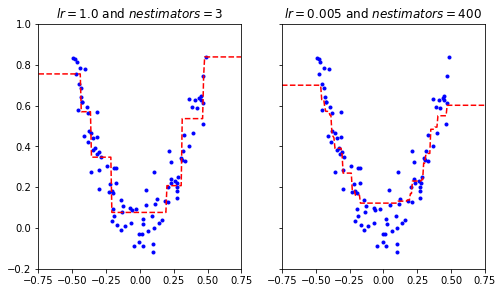

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt_1 = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt_1.fit(X, y)

gbrt_2 = GradientBoostingRegressor(max_depth=2, n_estimators=400, learning_rate=0.005)
gbrt_2.fit(X, y)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4.5), sharey=True)

plt.sca(ax0)
plt.title('$lr=1.0$ and $n estimators=3$')
plot_predictions([gbrt_1], X, y, [-0.75, 0.75, -0.2, 1])

plt.sca(ax1)
plt.title('$lr=0.005$ and $n estimators=400$')
plot_predictions([gbrt_2], X, y, [-0.75, 0.75, -0.2, 1])

##### Sci-kit learn Early Stop

In [110]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

gbtr = GradientBoostingRegressor(max_depth=2, n_estimators=350)
gbtr.fit(X_train, y_train)

errors_val = [mean_squared_error(y_val, y_pred) for y_pred in gbtr.staged_predict(X_val)]
errors_train = [mean_squared_error(y_train, y_pred) for y_pred in gbtr.staged_predict(X_train)]

In [ ]:
best_n_estimators = np.argmin(errors) + 1
best_error = errors_val[best_n_estimators - 1]

gbtr_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators)
gbtr_best.fit(X_train, y_train)

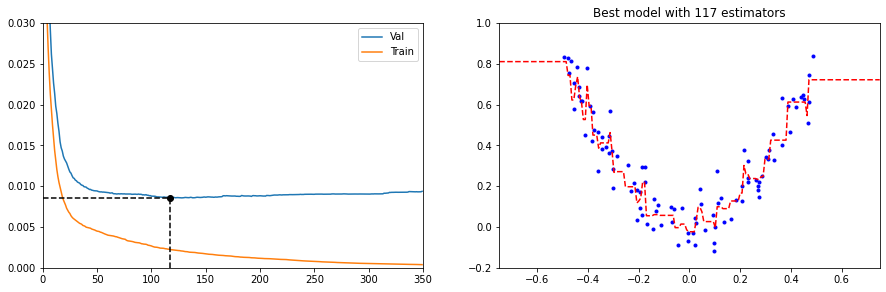

In [114]:
plt.figure(figsize=(15, 4.5))

plt.subplot(121)
plt.plot(errors_val, label='Val')
plt.plot(errors_train, label='Train')

plt.plot([best_n_estimators, best_n_estimators], [0, best_error], 'k--')
plt.plot([0, best_n_estimators], [best_error, best_error], 'k--')
plt.plot(best_n_estimators, best_error, 'ko')

plt.legend()
plt.ylim(0, 0.03)
plt.xlim(0, 350)



plt.subplot(122)
plt.title(f'Best model with {best_n_estimators} estimators')
plot_predictions([gbtr_best], X, y, [-0.75, 0.75, -0.2, 1])

plt.show()

#### Custom early stop

In [120]:
gbtr = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float('inf')
error_going_up = 0
best_n_estimators = None

for n_estimators in range(1, 120):
    gbtr.n_estimators = n_estimators
    gbtr.fit(X_train, y_train)

    y_pred = gbtr.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)

    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
        best_n_estimators = n_estimators
    else:
        error_going_up += 1
        if error_going_up == 8:
            best_n_estimators -= 5
            break

print(best_n_estimators)

117


### XGBoost

In [123]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=2)
y_pred = xgb_reg.predict(X_val)

mean_squared_error(y_val, y_pred)

[01:47:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.239805
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.220312
[2]	validation_0-rmse:0.203125
[3]	validation_0-rmse:0.188055
[4]	validation_0-rmse:0.174269
[5]	validation_0-rmse:0.162753
[6]	validation_0-rmse:0.153526
[7]	validation_0-rmse:0.144211
[8]	validation_0-rmse:0.136047
[9]	validation_0-rmse:0.129879
[10]	validation_0-rmse:0.124757
[11]	validation_0-rmse:0.119654
[12]	validation_0-rmse:0.116312
[13]	validation_0-rmse:0.113897
[14]	validation_0-rmse:0.112036
[15]	validation_0-rmse:0.109726
[16]	validation_0-rmse:0.108378
[17]	validation_0-rmse:0.107275
[18]	validation_0-rmse:0.105347
[19]	validation_0-rmse:0.104505
[20]	validation_0-rmse:0.102613
[21]	validation_0-rmse:0.101391
[22]	validation_0-rmse:0.100076
[23]	validation_0-rmse:0.099217
[24]	validation_0-rmse:0.098774
[25]	validation_0-r

0.008941489494422184